@author Gautam Kumar,
Email:gautam.kmr2893@outlook.com

In [42]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [43]:
Rawdata=pd.read_csv("house_data_session02.csv")
#Rawdata=Rawdata.notnull()
Rawdata=Rawdata.dropna()
Rawdata.head()

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Apartment,Swimming Pool,Price,Location
0,1340.0,3,1.00,3.0,1955.0,0.0,1.0,221900.0,Bangalore
1,1690.0,3,2.25,3.0,1951.0,0.0,0.0,538000.0,Bangalore
2,2720.0,2,1.00,3.0,1933.0,0.0,0.0,180000.0,Bangalore
3,1360.0,4,3.00,5.0,1965.0,1.0,1.0,604000.0,Bangalore
4,1800.0,3,3.00,3.0,1987.0,1.0,1.0,510000.0,Bangalore


In [44]:
Rawdata['No_Of_Bathrooms']=Rawdata['No_Of_Bathrooms'].apply(np.ceil)
#Rawdata.astype(str)
#Rawdata.describe()
#Rawdata.info()
Rawdata

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Apartment,Swimming Pool,Price,Location
0,1340.0,3,1.0,3.0,1955.0,0.0,1.0,221900.0,Bangalore
1,1690.0,3,3.0,3.0,1951.0,0.0,0.0,538000.0,Bangalore
2,2720.0,2,1.0,3.0,1933.0,0.0,0.0,180000.0,Bangalore
3,1360.0,4,3.0,5.0,1965.0,1.0,1.0,604000.0,Bangalore
4,1800.0,3,3.0,3.0,1987.0,1.0,1.0,510000.0,Bangalore
...,...,...,...,...,...,...,...,...,...
1193,890.0,2,1.0,3.0,1924.0,0.0,0.0,406000.0,lucknow
1194,2360.0,6,3.0,3.0,1961.0,0.0,1.0,632000.0,lucknow
1195,1630.0,5,3.0,3.0,1990.0,0.0,1.0,357000.0,lucknow
1196,1200.0,3,2.0,3.0,1964.0,0.0,1.0,361000.0,lucknow


In [20]:
#Perform  hot encoder
dummies=pd.get_dummies(Rawdata.Location)
#dummies
merge=pd.concat([Rawdata,dummies], axis='columns')
merge

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Apartment,Swimming Pool,Price,Location,Bangalore,Chennai,Kolkata,Mumbai,New Delhi,Patna,lucknow
0,1340.0,3,1.0,3.0,1955.0,0.0,1.0,221900.0,Bangalore,1,0,0,0,0,0,0
1,1690.0,3,3.0,3.0,1951.0,0.0,0.0,538000.0,Bangalore,1,0,0,0,0,0,0
2,2720.0,2,1.0,3.0,1933.0,0.0,0.0,180000.0,Bangalore,1,0,0,0,0,0,0
3,1360.0,4,3.0,5.0,1965.0,1.0,1.0,604000.0,Bangalore,1,0,0,0,0,0,0
4,1800.0,3,3.0,3.0,1987.0,1.0,1.0,510000.0,Bangalore,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,890.0,2,1.0,3.0,1924.0,0.0,0.0,406000.0,lucknow,0,0,0,0,0,0,1
1194,2360.0,6,3.0,3.0,1961.0,0.0,1.0,632000.0,lucknow,0,0,0,0,0,0,1
1195,1630.0,5,3.0,3.0,1990.0,0.0,1.0,357000.0,lucknow,0,0,0,0,0,0,1
1196,1200.0,3,2.0,3.0,1964.0,0.0,1.0,361000.0,lucknow,0,0,0,0,0,0,1


In [21]:
final_merge=merge.drop(['Location','Chennai'],axis='columns')
final_merge

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Apartment,Swimming Pool,Price,Bangalore,Kolkata,Mumbai,New Delhi,Patna,lucknow
0,1340.0,3,1.0,3.0,1955.0,0.0,1.0,221900.0,1,0,0,0,0,0
1,1690.0,3,3.0,3.0,1951.0,0.0,0.0,538000.0,1,0,0,0,0,0
2,2720.0,2,1.0,3.0,1933.0,0.0,0.0,180000.0,1,0,0,0,0,0
3,1360.0,4,3.0,5.0,1965.0,1.0,1.0,604000.0,1,0,0,0,0,0
4,1800.0,3,3.0,3.0,1987.0,1.0,1.0,510000.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,890.0,2,1.0,3.0,1924.0,0.0,0.0,406000.0,0,0,0,0,0,1
1194,2360.0,6,3.0,3.0,1961.0,0.0,1.0,632000.0,0,0,0,0,0,1
1195,1630.0,5,3.0,3.0,1990.0,0.0,1.0,357000.0,0,0,0,0,0,1
1196,1200.0,3,2.0,3.0,1964.0,0.0,1.0,361000.0,0,0,0,0,0,1


In [22]:
corr=Rawdata.corr()

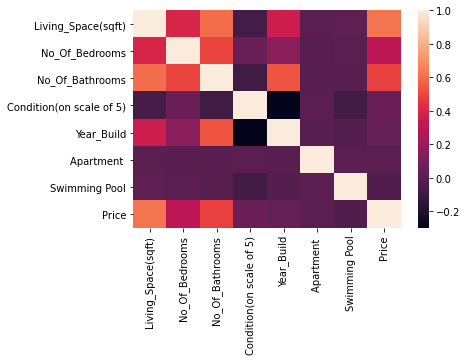

In [23]:
sns.heatmap(corr)
#null hypothesis

In [24]:
y=final_merge.Price
y

0       221900.0
1       538000.0
2       180000.0
3       604000.0
4       510000.0
          ...   
1193    406000.0
1194    632000.0
1195    357000.0
1196    361000.0
1197    277000.0
Name: Price, Length: 1191, dtype: float64

In [25]:
x=final_merge[["Living_Space(sqft)","No_Of_Bedrooms","No_Of_Bathrooms","Condition(on scale of 5)",
               "Year_Build","Bangalore","Kolkata","Mumbai","New Delhi","Patna","lucknow"]]
x

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Bangalore,Kolkata,Mumbai,New Delhi,Patna,lucknow
0,1340.0,3,1.0,3.0,1955.0,1,0,0,0,0,0
1,1690.0,3,3.0,3.0,1951.0,1,0,0,0,0,0
2,2720.0,2,1.0,3.0,1933.0,1,0,0,0,0,0
3,1360.0,4,3.0,5.0,1965.0,1,0,0,0,0,0
4,1800.0,3,3.0,3.0,1987.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1193,890.0,2,1.0,3.0,1924.0,0,0,0,0,0,1
1194,2360.0,6,3.0,3.0,1961.0,0,0,0,0,0,1
1195,1630.0,5,3.0,3.0,1990.0,0,0,0,0,0,1
1196,1200.0,3,2.0,3.0,1964.0,0,0,0,0,0,1


In [26]:
#dividing the data based on testing and training dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=2/3,random_state=0)

In [27]:
#Importing the linear regression model
from sklearn.linear_model import LinearRegression
createmodel=LinearRegression()
createmodel.fit(x_train,y_train)

LinearRegression()

In [28]:
y_predict=createmodel.predict(x_test)
y_predict

array([ -82671.01750002,  605853.47312122,  101857.9041522 ,
        232469.30849815,  758017.54517399,  850260.94087235,
        567014.35905742,  270370.73710556,  219715.47007366,
        538446.53015743,  651805.88554606,   62217.1514619 ,
        495264.92836912,  890987.71002013,  129430.62220329,
        465652.50294759,  327862.20154329,  986312.46460314,
        597860.03439077,  455603.96915672,  468749.86036299,
        339622.93276483,  594140.72128386,  484619.75813089,
        496090.3416791 ,  646517.13486593,  463424.72686845,
        536471.16501767,  366336.06524186,    6510.95403881,
        187547.1930142 ,  480479.14903731,  139743.38999256,
        773100.99456894,  576421.40056497,  588115.59770621,
        622104.90579426,  386330.41999217, 1073074.11801631,
        243790.31807955,  891860.40463945,  194575.33412444,
        410614.69237586,  373718.04950547,  383886.31950179,
         83393.781671  ,  390500.19921554,  573162.11198967,
        348141.7852375 ,

In [29]:
#calculating accuracy of a model
accuracy=createmodel.score(x,y)
accuracy

0.47793828991561116

In [30]:
#calculating the error in the model
error_in_model=1-accuracy
error_in_model

0.5220617100843888

In [32]:
#calculate MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predict)

166401.94607882263

In [37]:
#calculate MSE
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_predict)
MSE

49393725150.314445

In [38]:
#calculate RMSE
from math import sqrt
rmse_value=sqrt(MSE)
rmse_value

222246.99131892528

In [41]:
#calculate R2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), x, y,scoring='r2')
scores

array([0.44481807, 0.50405569, 0.45639769, 0.52514197, 0.41047161])

# Conclusion:As we all know that rsquared and rsquared_adj values should be near to one it means the performance of model is perfect but in case of this model the score and performance all is below 50%  so this model can't be deployed into production.


# Challenge:You guys have to improve the accuracy as well the performance??